In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

In [2]:
# 실루엣 계수 시각화를 위해 yellowbrick 라이브러리 설치
!pip install yellowbrick

In [3]:
from yellowbrick.cluster import SilhouetteVisualizer

## 데이터불러오기

In [4]:
df = pd.read_csv("./data/hack_data.csv")

## 데이터확인

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,Location,WPM_Typing_Speed
0,8.0,391.09,1,2.96,7.0,Slovenia,72.37
1,20.0,720.99,0,3.04,9.0,British Virgin Islands,69.08
2,31.0,356.32,1,3.71,8.0,Tokelau,70.58
3,2.0,228.08,1,2.48,8.0,Bolivia,70.80
4,20.0,408.50,0,3.57,8.0,Iraq,71.28


In [7]:
df.shape

(334, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Session_Connection_Time  334 non-null    float64
 1   Bytes Transferred        334 non-null    float64
 2   Kali_Trace_Used          334 non-null    int64  
 3   Servers_Corrupted        334 non-null    float64
 4   Pages_Corrupted          334 non-null    float64
 5   Location                 334 non-null    object 
 6   WPM_Typing_Speed         334 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 18.4+ KB


In [9]:
# 결측치 없음
# 문자형 데이터확인
df["Location"].unique()

array(['Slovenia', 'British Virgin Islands', 'Tokelau', 'Bolivia', 'Iraq',
       'Marshall Islands', 'Georgia', 'Timor-Leste',
       'Palestinian Territory', 'Bangladesh', 'Northern Mariana Islands',
       'Zimbabwe', 'Isle of Man', 'Sao Tome and Principe', 'Greece',
       'Solomon Islands', 'Guinea-Bissau', 'Burkina Faso', 'Mongolia',
       'Nigeria', 'Kazakhstan', 'Faroe Islands', 'Lebanon', 'Guyana',
       'Botswana', 'Zambia', 'Mexico', 'Gibraltar', 'Bhutan', 'Mayotte',
       'Guernsey', 'Saint Barthelemy', 'Cambodia', 'Tuvalu',
       'Philippines', 'Armenia', 'Nicaragua', 'Mauritania', 'Algeria',
       'Azerbaijan', 'Sri Lanka', 'Nauru',
       'Heard Island and McDonald Islands', 'Christmas Island',
       'Holy See (Vatican City State)', 'Haiti', 'Japan',
       'Syrian Arab Republic', 'Albania', 'United States Virgin Islands',
       'Israel', 'Czech Republic', 'Malaysia', 'Maldives', 'Norway',
       'South Africa', 'Afghanistan', 'Australia',
       'Saint Kitts and 

In [10]:
df["Location"].value_counts()

United States Virgin Islands    6
Guinea-Bissau                   5
Czech Republic                  5
Mauritania                      5
Trinidad and Tobago             4
                               ..
Austria                         1
Kuwait                          1
Samoa                           1
Mexico                          1
Canada                          1
Name: Location, Length: 181, dtype: int64

In [11]:
# 무의미하다고 판단되므로 삭제
df_1 = df.drop(["Location"],axis=1)

In [12]:
df_1.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,WPM_Typing_Speed
0,8.0,391.09,1,2.96,7.0,72.37
1,20.0,720.99,0,3.04,9.0,69.08
2,31.0,356.32,1,3.71,8.0,70.58
3,2.0,228.08,1,2.48,8.0,70.80
4,20.0,408.50,0,3.57,8.0,71.28


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Session_Connection_Time  334 non-null    float64
 1   Bytes Transferred        334 non-null    float64
 2   Kali_Trace_Used          334 non-null    int64  
 3   Servers_Corrupted        334 non-null    float64
 4   Pages_Corrupted          334 non-null    float64
 5   WPM_Typing_Speed         334 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 15.8 KB


## 데이터 전처리
    - StandardScaler

In [14]:
# StandardScaler
S_scaler = StandardScaler()
s_df = pd.DataFrame(S_scaler.fit_transform(df_1), columns = df_1.columns)

In [15]:
s_df.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,WPM_Typing_Speed
0,-1.564572,-0.756034,0.976328,-1.000019,-1.254790,1.122219
1,-0.711517,0.397838,-1.024246,-0.965213,-0.600968,0.876531
2,0.070449,-0.877647,0.976328,-0.673714,-0.927879,0.988547
3,-1.991099,-1.326184,0.976328,-1.208855,-0.927879,1.004976
4,-0.711517,-0.695140,-1.024246,-0.734624,-0.927879,1.040821


## 군집분석
1. 군집이 2개인 경우의 실루엣계수 확인
2. 군집이 3개인 경우의 실루엣계수 확인

### 1. 군집 2개

In [18]:
# KMeans
Skmeans2 = KMeans(n_clusters = 2 , init = "k-means++", max_iter=300, random_state=0)
Skmeans2.fit(s_df)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


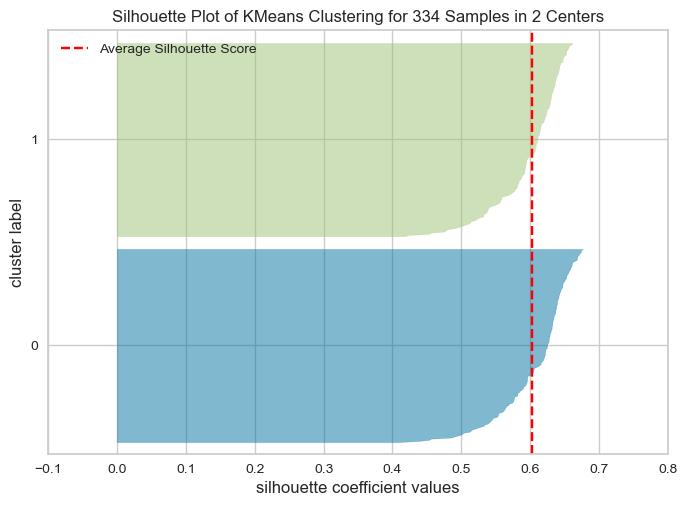

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 334 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
# 시각화
visualizer_s2 = SilhouetteVisualizer(Skmeans2, colors="yellowbrick")
visualizer_s2.fit(s_df)     
visualizer_s2.show()

In [20]:
# 군집/전체 실루엣 계수 평균값 계산
r_s2 = s_df.copy()

# 클러스터, 실루엣계수 컬럼 생성
r_s2.loc[:,"cluster"] = visualizer_s2.predict(s_df)
r_s2.loc[:,"silhouette coefficient"] = visualizer_s2.silhouette_samples_

r_s2.shape
r_s2.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,WPM_Typing_Speed,cluster,silhouette coefficient
0,-1.564572,-0.756034,0.976328,-1.000019,-1.254790,1.122219,1,0.648820
1,-0.711517,0.397838,-1.024246,-0.965213,-0.600968,0.876531,1,0.474564
2,0.070449,-0.877647,0.976328,-0.673714,-0.927879,0.988547,1,0.538724
3,-1.991099,-1.326184,0.976328,-1.208855,-0.927879,1.004976,1,0.614495
4,-0.711517,-0.695140,-1.024246,-0.734624,-0.927879,1.040821,1,0.628306


In [24]:
print('StandardScalear / 군집2개 실루엣 계수 평균')
s2 = r_s2['silhouette coefficient'].mean()
s2

StandardScalear / 군집2개 실루엣 계수 평균


0.6019979037700637

In [25]:
print('\n군집별 실루엣 계수 평균')
r_s2.groupby('cluster')['silhouette coefficient'].mean().reset_index()


군집별 실루엣 계수 평균


,cluster,silhouette coefficient
0,0,0.607359
1,1,0.596637


### 2. 군집 3개

In [32]:
# KMeans
Skmeans3 = KMeans(n_clusters = 3 , init = "k-means++", max_iter=300, random_state=0)
Skmeans3.fit(s_df)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


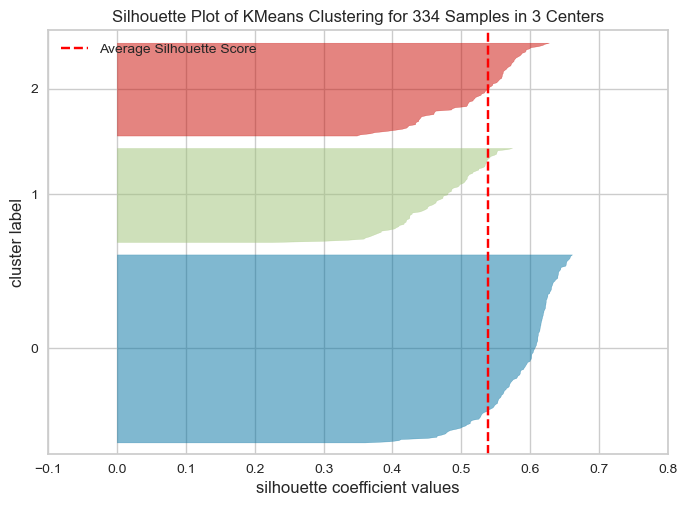

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 334 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
# 시각화
visualizer_s3 = SilhouetteVisualizer(Skmeans3, colors="yellowbrick")
visualizer_s3.fit(s_df)     
visualizer_s3.show()

In [36]:
# 군집/전체 실루엣 계수 평균값 계산
r_s3 = s_df.copy()

# 클러스터, 실루엣계수 컬럼 생성
r_s3.loc[:,"cluster"] = visualizer_s3.predict(s_df)
r_s3.loc[:,"silhouette coefficient"] = visualizer_s3.silhouette_samples_

r_s3.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,WPM_Typing_Speed,cluster,silhouette coefficient
0,-1.564572,-0.756034,0.976328,-1.000019,-1.254790,1.122219,2,0.545095
1,-0.711517,0.397838,-1.024246,-0.965213,-0.600968,0.876531,1,0.370238
2,0.070449,-0.877647,0.976328,-0.673714,-0.927879,0.988547,2,0.462236
3,-1.991099,-1.326184,0.976328,-1.208855,-0.927879,1.004976,2,0.421767
4,-0.711517,-0.695140,-1.024246,-0.734624,-0.927879,1.040821,1,0.566280


In [38]:
print('StandardScalear / 군집3개 실루엣 계수 평균')
s3 = r_s3['silhouette coefficient'].mean()
s3

StandardScalear / 군집3개 실루엣 계수 평균


0.5390036876535975

In [39]:
print('\n군집별 실루엣 계수 평균')
r_s3.groupby('cluster')['silhouette coefficient'].mean().reset_index()


군집별 실루엣 계수 평균


,cluster,silhouette coefficient
0,0,0.585911
1,1,0.466611
2,2,0.517889


In [48]:
t = pd.DataFrame({"silhouette coefficient mean" : [s2,s3]},index=["cluster2", "cluster3"])
t

,silhouette coefficient mean
cluster2,0.601998
cluster3,0.539004


# 결과분석
    - 군집이 2개일 때의 평균이 1에 더 가까움
    - 군집이 2개일 때 KMeans 클러스터링이 더 잘 수행되었다고 판단됨
    - 해커는 2명으로 판단됨